In [1]:
import numpy as np
from keras import datasets
from keras import models, layers
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\kyh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\kyh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\kyh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\kyh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (ty

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()
print(X_train.shape[0])
print(X_train.shape[:])
print(X_train.shape[1:])

img_rows, img_cols = X_train.shape[1:]

print(img_rows)
print(img_cols)

60000
(60000, 28, 28)
(28, 28)
28
28


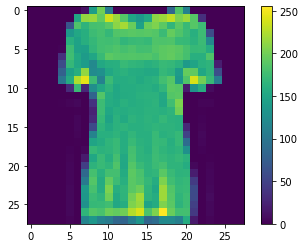

In [3]:
plt.figure()
plt.imshow(X_train[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
from keras import backend

if backend.image_data_format=='channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols) #원래 4차원임
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) #cosjfdl aos enldp rka
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [5]:
num_classes=10

X_train = X_train.astype('float32') #형변환으로 에러나는 경우가 종종 있음
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

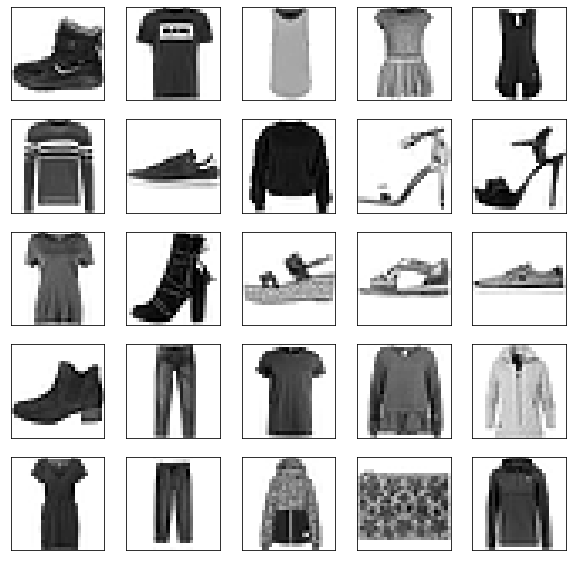

In [6]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(X_train[i].reshape(28,28), cmap=plt.cm.binary)

plt.show()

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), 
                        activation='relu', 
                       input_shape=(28,28,1))) #CNN이니까 Dense() 못쓰고, 1차원으로 펼치면 안됨.
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten()) #FCN 쓰기 직전에 1차원으로 펴줌
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               921700    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)              

In [8]:
model.compile('adam', 'categorical_crossentropy',metrics=['accuracy'])

In [9]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training','Validation'])
    plt.savefig('C:/kyh/Loss_plot.png', dpi=300) #웹프로젝트시 경로 지정할 수 있음
    plt.show()
    
def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training','Validation'])
    plt.savefig('C:/kyh/Acc_plot.png', dpi=300) #웹프로젝트시 경로 지정할 수 있음
    plt.show()
    
history = model.fit(X_train, Y_train, epochs=10, batch_size=100, validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 42s 875us/step - loss: 0.5116 - accuracy: 0.8185 - val_loss: 0.3260 - val_accuracy: 0.8810
Epoch 2/10
48000/48000 [==============================] - 48s 1ms/step - loss: 0.3216 - accuracy: 0.8846 - val_loss: 0.2767 - val_accuracy: 0.8979
Epoch 3/10
48000/48000 [==============================] - 45s 930us/step - loss: 0.2676 - accuracy: 0.9016 - val_loss: 0.2448 - val_accuracy: 0.9111
Epoch 4/10
48000/48000 [==============================] - 50s 1ms/step - loss: 0.2322 - accuracy: 0.9147 - val_loss: 0.2373 - val_accuracy: 0.9108
Epoch 5/10
48000/48000 [==============================] - 49s 1ms/step - loss: 0.2065 - accuracy: 0.9234 - val_loss: 0.2359 - val_accuracy: 0.9138
Epoch 6/10
48000/48000 [==============================] - 48s 1ms/step - loss: 0.1817 - accuracy: 0.9326 - val_loss: 0.2178 - val_accuracy: 0.9235
Epoch 7/10
48000/48000 [==============================] - 54s 1

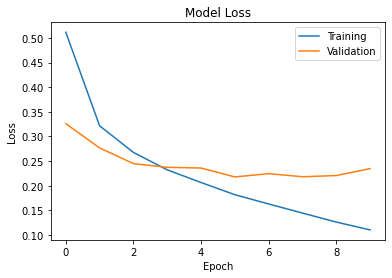

In [10]:
plot_loss(history)

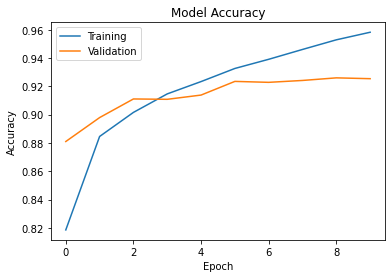

In [11]:
plot_acc(history)

In [13]:
print(model.evaluate(X_test, Y_test, batch_size=100))

10000/10000 [==============================] - 2s 205us/step
[0.2512177301198244, 0.9207000136375427]


In [14]:
model.save('C:/kyh/fashion_mnist.h5') # 해당 경로에 저장됨.